In [2]:
import numpy as np
import configargparse
from utils.auxillary import prepare_data, prepare_data_all
import methods
import cupy as cp
from args import parse

opt = parse('-c configs/exp4.conf')

training_samples, test_validation_samples = prepare_data_all('ytc_py.pkl', opt.mode)
sample = test_validation_samples[10]

if opt.mode == 'test':
    if opt.method == 'msm':
        classifier = methods.MSM(opt.dim_subspace, opt.num_cosines)
    elif opt.method == 'kmsm':
        classifier = methods.KMSM(opt.dim_subspace, opt.num_cosines, opt.sigma, opt.kernel)
    elif opt.method == 'kmsm_mod':
        classifier = methods.KMSM_MOD(opt.dim_subspace, opt.num_cosines, opt.sigma, opt.kernel, opt.dim_diffspace)
    
classifier.train(training_samples)



gt_label = sample[0]
pred_labels, scores, mod_scores, candidate_imgs = classifier.evalulate_single(sample[1])
highest_label  = pred_labels[cp.asnumpy(cp.argmax(scores))] 

print(f'Correct Label : {gt_label}, Predicted Labels : {highest_label}')
print(f'Top 5 candidates were {np.array(pred_labels, dtype=object)[cp.asnumpy((cp.argsort(scores))[::-1])] }')


import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1, cols=1)


fig.add_trace(go.Bar(x = pred_labels, y =cp.asnumpy(-1/cp.log(scores)) ), row = 1, col = 1)
fig.show()


Correct Label : john_kerry, Predicted Labels : john_kerry
Top 5 candidates were ['john_kerry' 'jet_li' 'christian_slater' 'sandra_bullock'
 'anderson_cooper']


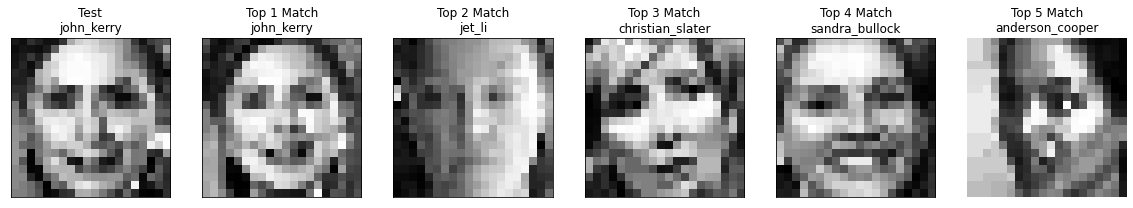

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 20))
#plt.style.use("dark_background")
axes = []
axes.append(fig.add_subplot(1,6,1))
axes[0].imshow(sample[1][:, 0].reshape(20,20), cmap = 'gray')
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)
axes[0].set_title(f'Test\n{gt_label}')

for i in range(1,6):
    axes.append(fig.add_subplot(1,6,i+1))
    axes[i].imshow(cp.asnumpy(candidate_imgs[i-1])[:, 0].reshape(20,20), cmap = 'gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
    axes[i].set_title(f'Top {i} Match\n{pred_labels[i-1]}')
plt.axis('off')
plt.show()

In [ ]:
import optuna
import matplotlib.pyplot as plt

expname = 'val_problem2'

loaded_study = optuna.load_study(study_name=expname, storage=f"sqlite:///db/{expname}.db")
	
optuna.visualization.plot_param_importances(loaded_study)